# **Dicoding Submission Intermediate Machine Learning Developer NLP**

---


Name: Bethelsando Gemilang Wahyudi

---


Dataset: [https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset)

---

1. VALIDATION ACCURACY: >90%
2. TRAINING ACCURACY: >90%
3. CALLBACK: EARLY & ACCURACY
4. DATASET: 12000 SAMPLE (4 CLASS)
5. PLOT: LOSS AND ACCURACY (TRAINING & VALIDATION)  
---


## **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import string
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **Loading Data**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bethelsandogw","key":"048f3afb905739bfe6c6ec52fc95fc8a"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jan 28 12:45 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!pwd

/content


In [8]:
!kaggle datasets list

ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science                76KB  2023-12-25 20:03:32          10788        208  1.0              
nelgiriyewithana/apple-quality                              Apple Quality                                   170KB  2024-01-11 14:31:07           4173        103  1.0              
joebeachcapital/57651-spotify-songs                         57,650 Spotify Songs                             21MB  2024-01-23 06:48:36            995         33  1.0              
sahilwagh/gold-stock-prices                                 Gold Stock Prices                       

In [9]:
!kaggle datasets download -d amananandrai/ag-news-classification-dataset

 79% 9.00M/11.4M [00:00<00:00, 88.1MB/s]
100% 11.4M/11.4M [00:00<00:00, 103MB/s] 


In [10]:
!unzip ag-news-classification-dataset.zip

Archive:  ag-news-classification-dataset.zip
  inflating: test.csv                
  inflating: train.csv               


## **Read Data**

In [11]:
df = pd.read_csv('train.csv')
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [12]:
label_mapping = {1:'world', 2:'sports', 3:'business', 4:'sci-tech'}
df['Class Index'] = df['Class Index'].map(label_mapping)
df['category'] = df['Class Index']
df

,Class Index,Title,Description,category
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",business
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,business
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,business
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,business
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",business
...,...,...,...,...
119995,world,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,world
119996,sports,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,sports
119997,sports,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,sports
119998,sports,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,sports


## **Sampling Data**

In [13]:
class SamplingData():
  def __init__(self, column='category') -> None:
     self.column = column

  def show_category_counts(self, data_frame):
      category_counts = data_frame[self.column].value_counts()
      category_counts.plot.bar()
      plt.title(f'Jumlah Data pada Setiap Kelas ({self.column})')
      plt.xlabel(self.column)
      plt.ylabel('Jumlah Data')
      plt.show()
      print(category_counts)
      print("\n Total Data: ", data_frame.shape[0])

  def undersampling_data(self, data_frame) -> pd.DataFrame:
      min_count = data_frame[self.column].value_counts().min()
      under_sampler = RandomUnderSampler(sampling_strategy={label: min_count for label in data_frame[self.column].unique()})
      X_resampled, y_resampled = under_sampler.fit_resample(data_frame.drop(columns=[self.column]), data_frame[self.column])
      resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=data_frame.columns.drop(self.column)), pd.Series(y_resampled, name=self.column)], axis=1)

      return resampled_df


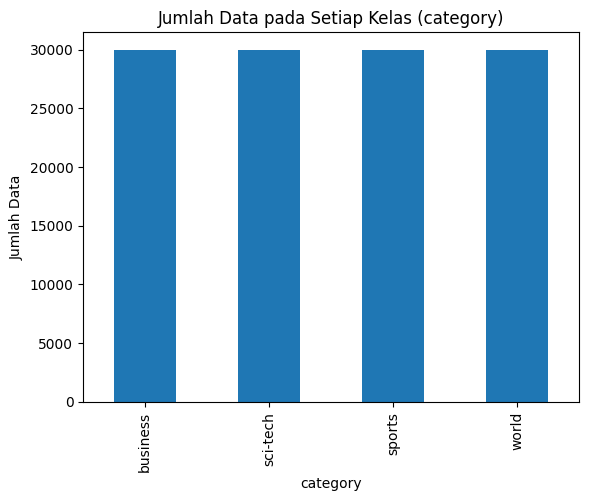

business    30000
sci-tech    30000
sports      30000
world       30000
Name: category, dtype: int64

 Total Data:  120000


In [14]:
sd = SamplingData()
sd.show_category_counts(df)

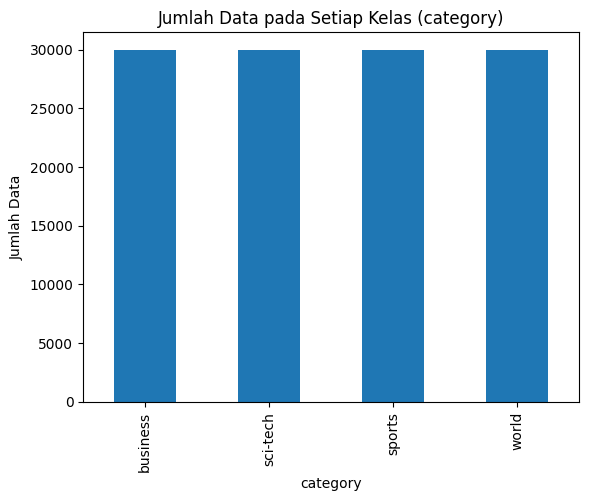

business    30000
sci-tech    30000
sports      30000
world       30000
Name: category, dtype: int64

 Total Data:  120000


In [15]:
resample_df = sd.undersampling_data(df)
sd.show_category_counts(resample_df)

## **Feature Selection Data**

In [16]:
main_df = resample_df.drop(columns=['Title', 'Class Index'])
main_df

,Description,category
0,WASHINGTON (Reuters) - The Bush administratio...,business
1,WASHINGTON (Reuters) - U.S. machine tool dema...,business
2,The success of a start-up magazine rests on ma...,business
3,"Jewelry retailer Tiffany amp; Co., dragged do...",business
4,Tuesday night's D.C. Council vote on baseball ...,business
...,...,...
119995,PRIME Minister John Howard conceded yesterday ...,world
119996,ISLAMABAD: The Senate opposition rejected the ...,world
119997,AFP - A teenage youth was due in the dock for ...,world
119998,(State Department) -- Secretary of State Colin...,world


## **Data Analyze**

In [17]:
main_df.describe()

,Description,category
count,120000,120000
unique,118723,4
top,"With the economy slowly turning up, upgrading ...",business
freq,15,30000


In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  120000 non-null  object
 1   category     120000 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [19]:
main_df.isna().sum()

Description    0
category       0
dtype: int64

In [20]:
main_df = main_df.dropna(how='any', axis=0)
main_df.isna().sum()

Description    0
category       0
dtype: int64

**Saving length every Description**

In [21]:
main_df['DescLength'] = main_df['Description'].apply(len)
main_df

,Description,category,DescLength
0,WASHINGTON (Reuters) - The Bush administratio...,business,375
1,WASHINGTON (Reuters) - U.S. machine tool dema...,business,234
2,The success of a start-up magazine rests on ma...,business,98
3,"Jewelry retailer Tiffany amp; Co., dragged do...",business,186
4,Tuesday night's D.C. Council vote on baseball ...,business,165
...,...,...,...
119995,PRIME Minister John Howard conceded yesterday ...,world,119
119996,ISLAMABAD: The Senate opposition rejected the ...,world,154
119997,AFP - A teenage youth was due in the dock for ...,world,174
119998,(State Department) -- Secretary of State Colin...,world,257


## **Analyze NLP Data**

### **Analyze Stopwords**

In [22]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
def init_corpus(category, dframe):
  corpus = []

  for list_words in dframe[dframe['category']==category]['Description'].str.split():
    for word in list_words:
      corpus.append(word.lower())

  return corpus

def common_stopwords(category, dframe):
  corpus = init_corpus(category, dframe)

  dict_result = defaultdict(int)
  for word in corpus:
    if word in stop_words:
      dict_result[word] += 1

  top_result = sorted(dict_result.items(), key=lambda x : x[1], reverse=True)[:10] # Top Ten

  x, y = zip(*top_result)
  plt.bar(x, y)
  plt.title(category)
  plt.show()

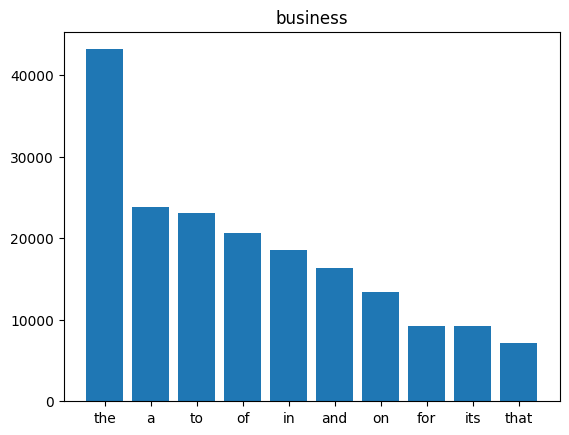

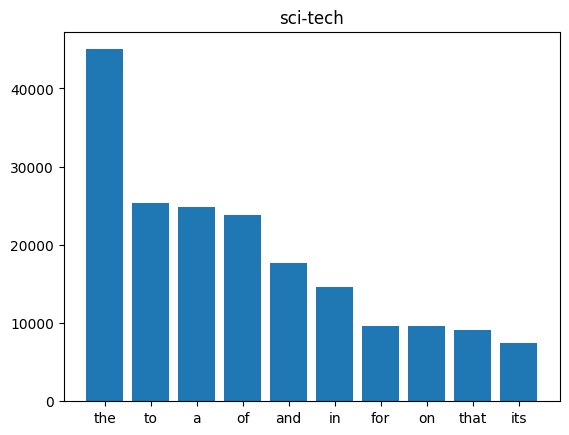

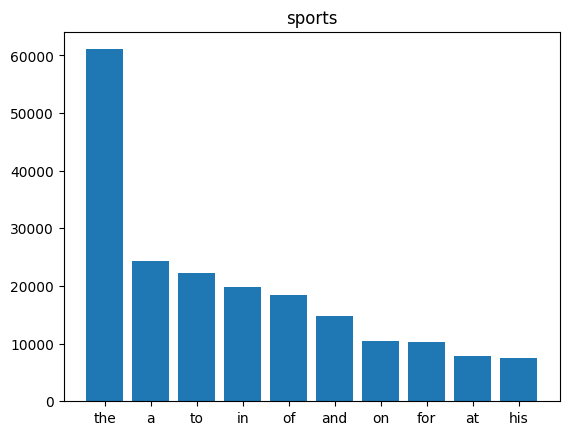

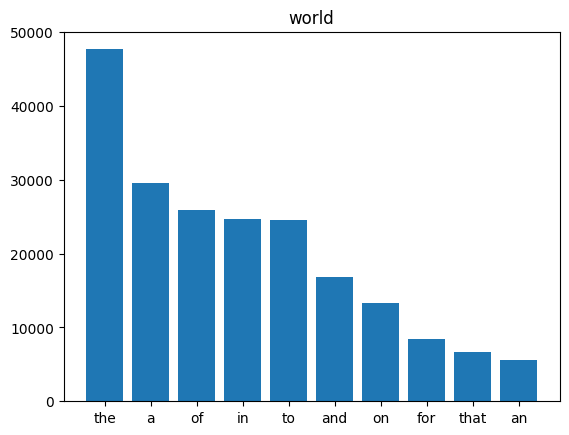

In [24]:
for category in main_df.category.unique():
  common_stopwords(category, main_df)

### **Analyze Punctuations**

In [25]:
def analyze_punctuations(category, dframe):
  corpus = init_corpus(category, dframe)

  dict_result = defaultdict(int)

  special_char = string.punctuation

  for word in corpus:
    for char in special_char:
      if char in word:
        dict_result[char] += 1


  x, y = zip(*dict_result.items())
  plt.bar(x, y)
  plt.title(category)
  plt.show()

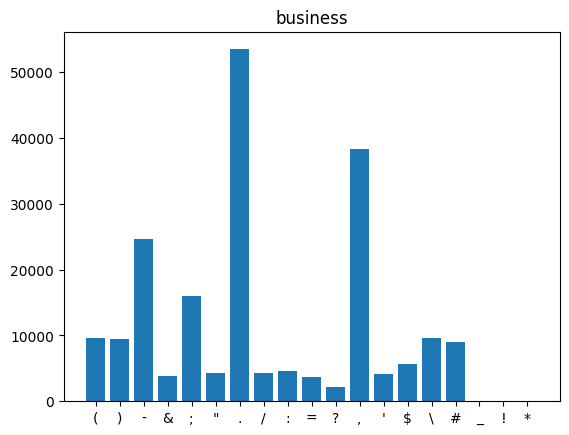

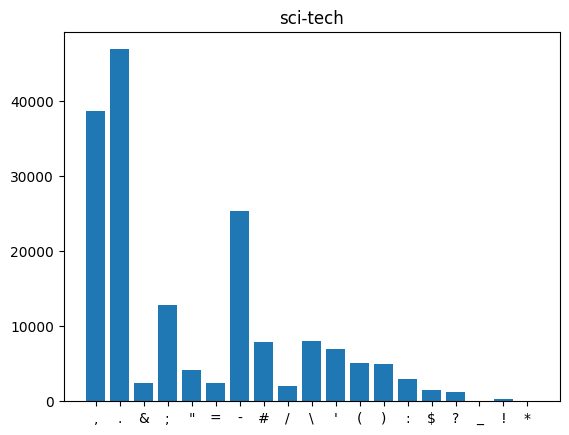

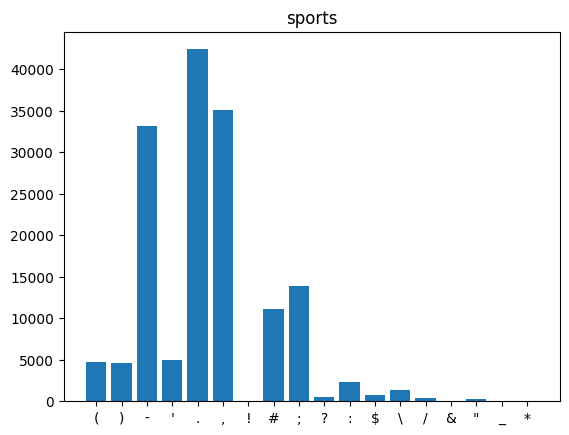

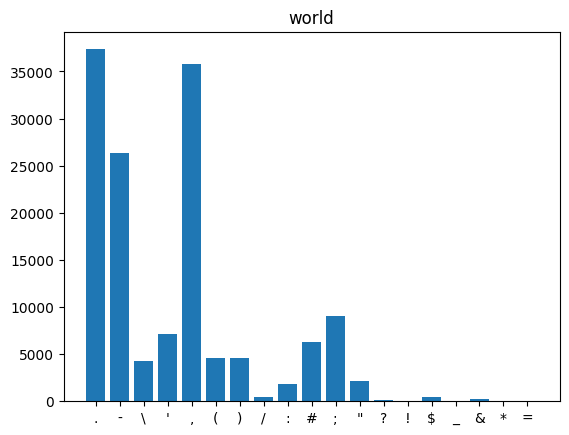

In [26]:
for category in df.category.unique():
  analyze_punctuations(category, main_df)

### **Analyze Number in Title**

In [27]:
def analyze_numbers(category, dframe):
    corpus = init_corpus(category, dframe)

    dict_result = defaultdict(int)

    for word in corpus:
        for char in word:
            if char.isdigit():
                dict_result[char] += 1

    x, y = zip(*dict_result.items())
    plt.bar(x, y)
    plt.title(f"{category}")
    plt.show()

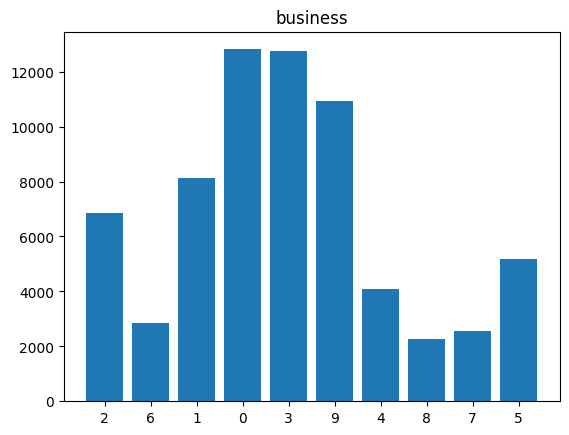

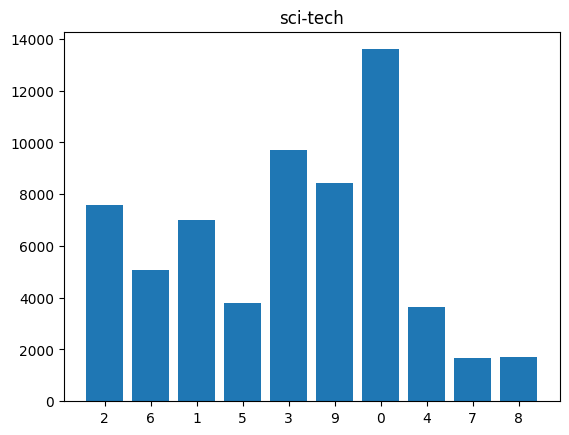

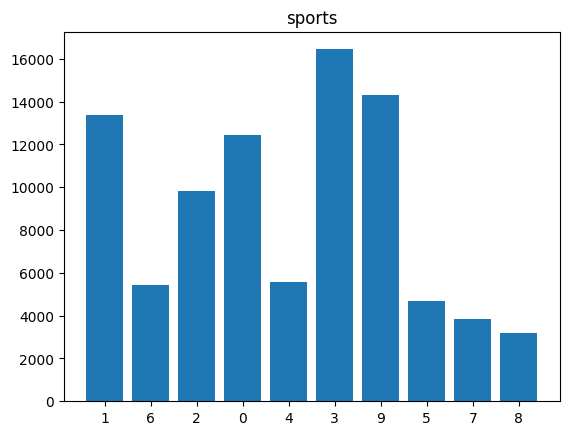

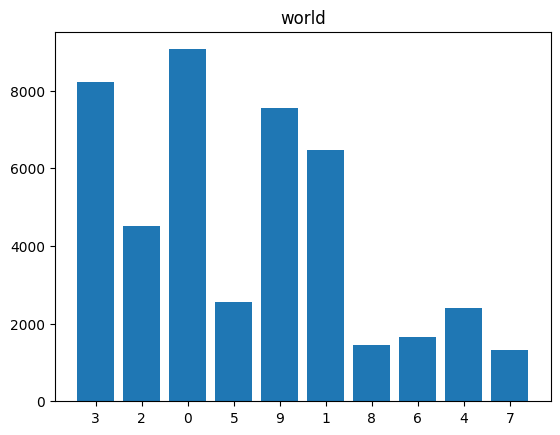

In [28]:
for category in df.category.unique():
  analyze_numbers(category, main_df)

### **Analyze Common Words**

In [29]:
def common_words(label, dframe):
  corpus = init_corpus(label, dframe)
  counter = Counter(corpus)
  most = counter.most_common()

  x = []
  y = []

  for word, count in most[:40]:
    if (word not in stop_words):
      x.append(word)
      y.append(count)

  sns.barplot(x=y, y=x)
  plt.title(label)
  plt.show()

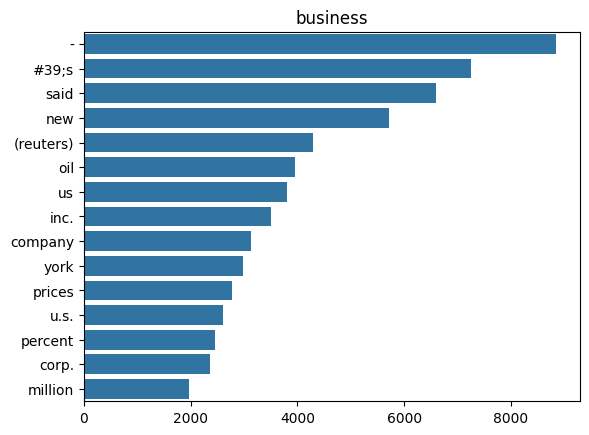

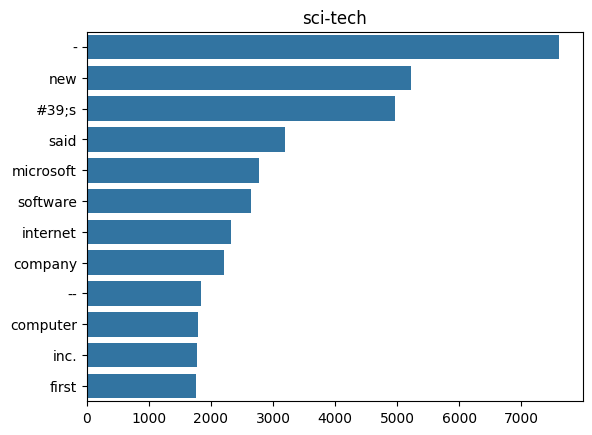

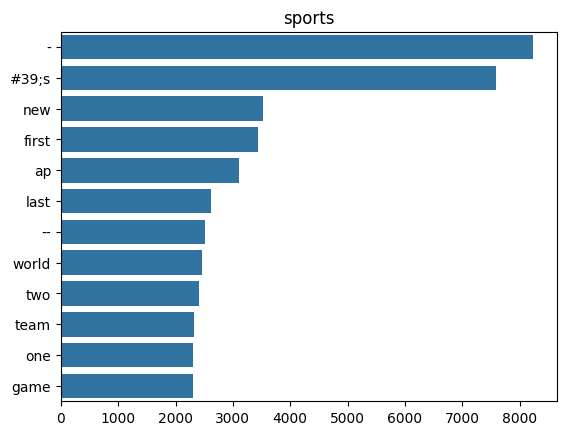

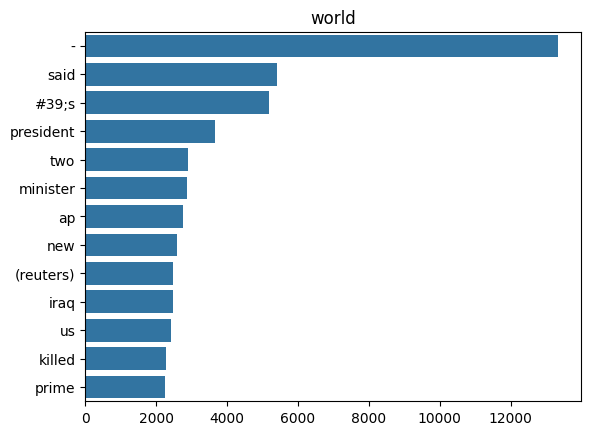

In [30]:
for category in df.category.unique():
  common_words(category, main_df)

In [31]:
def get_top_category_ngrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

<Axes: >

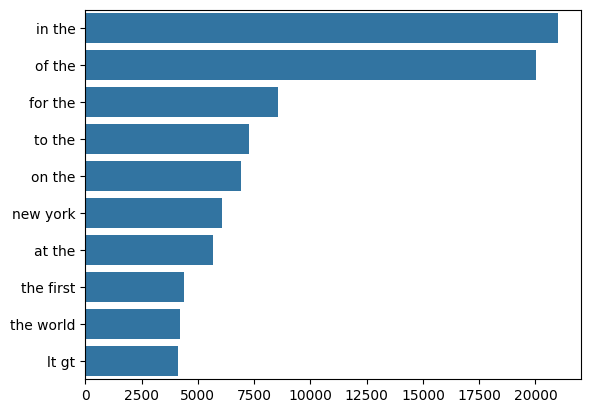

In [32]:
top_category_ngrams = get_top_category_ngrams(main_df['Description'])[:10]
x, y = map(list, zip(*top_category_ngrams))
sns.barplot(x=y, y=x)

## **Data Cleaning**

In [33]:
def lowercase_text(text):
    return text.lower()

text = "Hello World!"
lowercased_text = lowercase_text(text)
print(lowercased_text)

hello world!


In [34]:
main_df['Description'] = main_df['Description'].apply(lambda x: lowercase_text(x))

### **Stemming Word**

In [35]:
def stemming_word(text):
    stemmer = PorterStemmer()

    words = word_tokenize(text)

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text
example = "Walking in the garden with my friends"
print(stemming_word(example))

walk in the garden with my friend


In [36]:
main_df['Description'] = main_df['Description'].apply(lambda x: stemming_word(x))

### **Removing Punctuation**

In [37]:
def remove_punctuation(text):
    punctuation_set = set(string.punctuation)

    text_no_punct = ''.join(char for char in text if char not in punctuation_set)

    return text_no_punct

example = "Global Health Crisis: Vaccination Rollout Faces Setbacks - What's Next for Public Health?"
print(remove_punctuation(example))

Global Health Crisis Vaccination Rollout Faces Setbacks  Whats Next for Public Health


In [38]:
main_df['Description'] = main_df['Description'].apply(lambda x: remove_punctuation(x))

### **Removing Stopwords**

In [39]:
def remove_stopwords(text):
    words = word_tokenize(text)

    filtered_words = [word for word in words if word.lower() not in stop_words]

    text_without_stopwords = ' '.join(filtered_words)

    return text_without_stopwords

example = "This is an example sentence with some stopwords that need to be removed."
print(remove_stopwords(example))

example sentence stopwords need removed .


In [40]:
main_df['Description'] = main_df['Description'].apply(lambda x: remove_stopwords(x))

### **Removing Number**

In [41]:
def remove_numbers(input_string):
    result_string = ''.join(char for char in input_string if not char.isdigit())
    return result_string

In [42]:
main_df['Description'] = main_df['Description'].apply(lambda x: remove_numbers(x))

## **Data Preprocessing**

Get Maximum Character length

In [43]:
maxlen = max(main_df['DescLength'])
maxlen

985

### **Label Encoding (One-Hot Encoding)**

In [44]:
category = pd.get_dummies(main_df.category)
cleaned_df = pd.concat([main_df, category], axis=1)
cleaned_df = cleaned_df.drop(columns='category')
cleaned_df

,Description,DescLength,business,sci-tech,sports,world
0,washington reuter bush administr express fresh...,375,1,0,0,0
1,washington reuter us machin tool demand august...,234,1,0,0,0
2,success startup magazin rest mani factor least...,98,1,0,0,0
3,jewelri retail tiffani amp co drag weakerthane...,186,1,0,0,0
4,tuesday night dc council vote basebal left bus...,165,1,0,0,0
...,...,...,...,...,...,...
119995,prime minist john howard conced yesterday fres...,119,0,0,0,1
119996,islamabad senat opposit reject twooffic bill m...,154,0,0,0,1
119997,afp teenag youth wa due dock first trial suspe...,174,0,0,0,1
119998,state depart secretari state colin powel japan...,257,0,0,0,1


### **Spliting Dataset**

In [45]:
title = cleaned_df['Description'].values
label = cleaned_df[['business', 'sci-tech', 'sports', 'world']].values

X_train, X_test, y_train, y_test = train_test_split(title, label, test_size=0.2)

### **Tokenizing and Padding Dataset**

In [46]:
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(X_train)
# tokenizer.fit_on_texts(X_test)

train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

train_padded = pad_sequences(
    sequences=train_sequence,
    maxlen=maxlen,
    # padding='post',
    # truncating='post',
)
test_padded = pad_sequences(
    sequences=test_sequence,
    maxlen=maxlen,
    # padding='post',
    # truncating='post'
)

## **Modelling**

### **Callback**

In [73]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90:
      print("\nAccuracy and Val Accuracy more than 90%!")
      self.model.stop_training = True

callback_accuracy = myCallback()

In [48]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5, mode='min', min_delta=0.01)

### **Model Architecture**

**Params for Embedding**

In [49]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
input_length = train_padded.shape[1]
output_unit_size = y_train.shape[1]
output_dim = 50

**Model Architecture**

In [74]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=output_dim),
    LSTM(64),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(output_unit_size, activation='softmax')
])

### **Compile and Visualize Model**

In [75]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 50)          250000    
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 4)                 260       
                                                                 
Total params: 296276 (1.13 MB)
Trainable params: 29627

In [77]:
num_epochs = 30
history = model.fit(
    train_padded,
    y_train,
    epochs=num_epochs,
    validation_data=(test_padded, y_test),
    verbose=2,
    batch_size=128,
    callbacks=[callback_accuracy, early_stopping]
    )

Epoch 1/30
750/750 - 136s - loss: 0.5852 - accuracy: 0.8141 - val_loss: 0.3262 - val_accuracy: 0.8951 - 136s/epoch - 182ms/step
Epoch 2/30
750/750 - 33s - loss: 0.3021 - accuracy: 0.9063 - val_loss: 0.3065 - val_accuracy: 0.8991 - 33s/epoch - 43ms/step
Epoch 3/30
750/750 - 28s - loss: 0.2710 - accuracy: 0.9162 - val_loss: 0.3084 - val_accuracy: 0.8997 - 28s/epoch - 38ms/step
Epoch 4/30

Accuracy and Val Accuracy more than 90%!
750/750 - 32s - loss: 0.2495 - accuracy: 0.9216 - val_loss: 0.3112 - val_accuracy: 0.9003 - 32s/epoch - 43ms/step


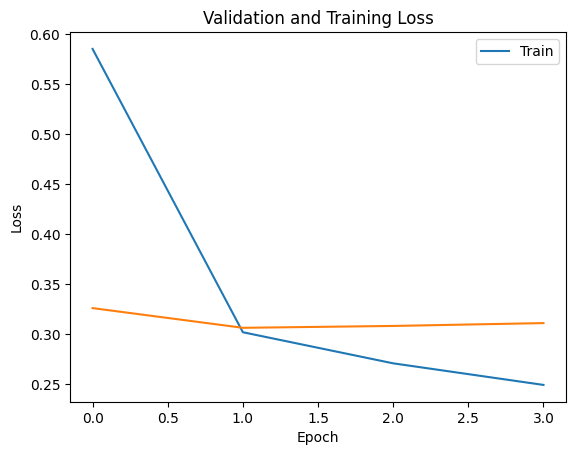

In [78]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation and Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

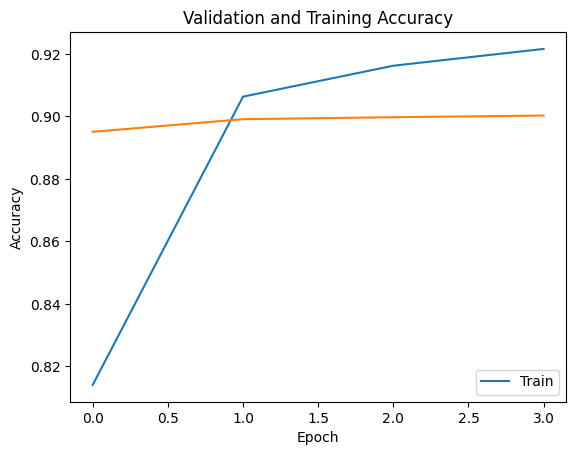

In [79]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation and Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()